## Data Loading & Preprocessing
The foundation of any machine learning project is the data. We need to load the image data and prepare it in a format suitable for our PyTorch model.

Using _torchvision.datasets_, you can easily download and load popular image datasets like CIFAR-10. You'll specify the root directory where the data should be stored, whether to download it if it's not present, and whether it's for training or testing.

The _torch.utils.data.DataLoader_ class is crucial here. It wraps the dataset and provides functionalities like batching (processing data in smaller chunks), shuffling (randomizing the order of data during training to prevent the model from learning the order), and parallel loading (using multiple worker processes to speed up data loading).

In [14]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define transformations to apply to the images
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image or NumPy array to PyTorch Tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalize pixel values
])

In [15]:
# Load the training dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=32,
                          shuffle=True, num_workers=2)

In [16]:
# Load the test dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=32,
                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

## Data Cleaning and Observations:

Real-world datasets can have issues like missing values, corrupted images, or inconsistencies. Observing the data helps us understand its characteristics and potential problems.

For image data, "cleaning" might involve identifying and removing corrupted or irrelevant images. Observations involve visualizing sample images from each class to get a feel for the data, checking the class distribution to see if it's balanced, and understanding the image dimensions and format.

Write code to iterate through the _DataLoader_ and display a few images from each class using _matplotlib.pyplot_. Check the number of samples per class.

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [18]:
# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

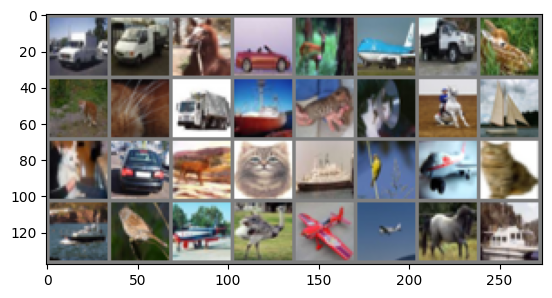

truck truck horse car  


In [19]:
# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [20]:
# Check class distribution
class_counts = {}
for _, label in trainset:
    if classes[label] not in class_counts:
        class_counts[classes[label]] = 0
    class_counts[classes[label]] += 1
print("Class Distribution:", class_counts)

Class Distribution: {'frog': 5000, 'truck': 5000, 'deer': 5000, 'car': 5000, 'bird': 5000, 'horse': 5000, 'ship': 5000, 'cat': 5000, 'dog': 5000, 'plane': 5000}


## Exploratory Data Analysis (EDA):

EDA helps us gain deeper insights into the data patterns, relationships between features (though less direct with raw images), and potential challenges for model training.

- Visualizing more images: Displaying a larger sample of images from each class to observe variations.
- Analyzing pixel intensity distributions: Plotting histograms of pixel values for different channels (R, G, B) to understand the overall color distribution.
- Checking for class imbalances: Visualizing the distribution of classes using bar plots.
- Looking for any obvious patterns or anomalies within classes.

Use _matplotlib_ and _seaborn_ to create visualizations like histograms of pixel values and bar plots of class distributions.

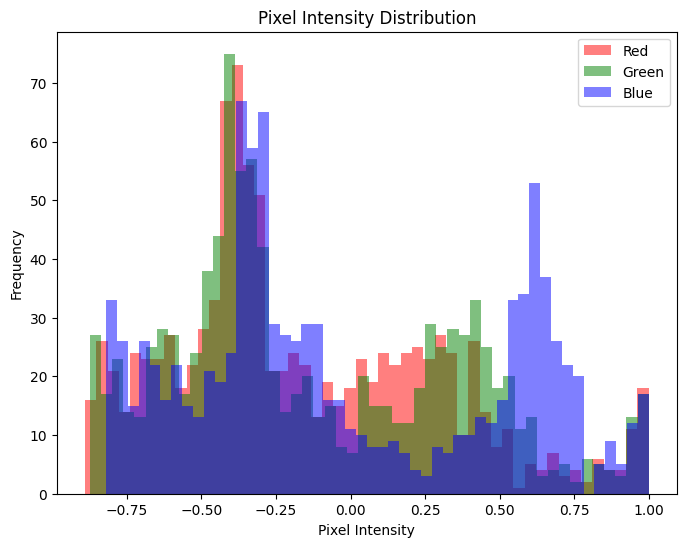

In [21]:
# Example: Plotting pixel intensity histograms (for one image)
img_tensor = images[0] # Get the first image tensor
r_channel = img_tensor[0].numpy().flatten()
g_channel = img_tensor[1].numpy().flatten()
b_channel = img_tensor[2].numpy().flatten()

plt.figure(figsize=(8, 6))
plt.hist(r_channel, bins=50, color='red', alpha=0.5, label='Red')
plt.hist(g_channel, bins=50, color='green', alpha=0.5, label='Green')
plt.hist(b_channel, bins=50, color='blue', alpha=0.5, label='Blue')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution')
plt.legend()
plt.show()

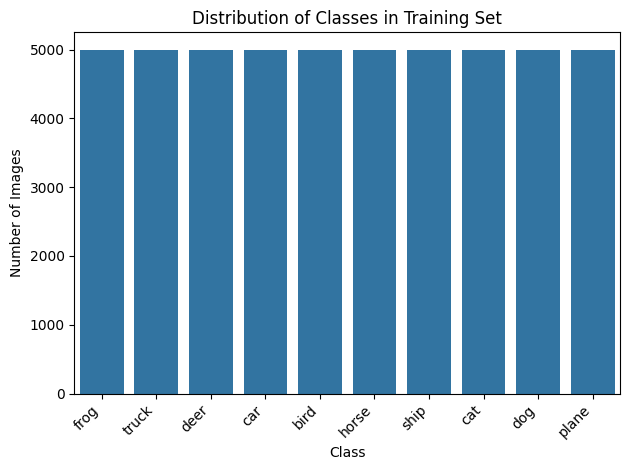

In [23]:
# Plotting class distribution
import seaborn as sns

class_names, counts = zip(*class_counts.items())
sns.barplot(x=list(class_names), y=list(counts))
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes in Training Set')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Feature Engineering (Image Augmentation):

Deep learning models often require a large amount of data to generalize well. Image augmentation techniques create modified versions of the existing images, effectively increasing the training data size and improving the model's robustness to variations like slight rotations, translations, scaling, and changes in brightness or contrast.

PyTorch's _torchvision.transforms_ module provides a variety of image augmentation techniques. You can chain these transformations together using _transforms.Compose_.

Carefully select augmentation techniques relevant to your dataset and the potential variations in real-world images. Common techniques include _RandomCrop, RandomHorizontalFlip, RandomRotation, ColorJitter,_ and _RandomAffine_. Apply these transformations only to the training data to avoid data leakage into the validation/test sets.

In [27]:
transform_augmented = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transform = transforms.Compose([ # No augmentation for test set
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [28]:
# Load the training dataset with augmentation
trainset_augmented = torchvision.datasets.CIFAR10(root='./data', train=True,
                                                download=True, transform=transform_augmented)
trainloader_augmented = DataLoader(trainset_augmented, batch_size=32,
                                                  shuffle=True, num_workers=2)


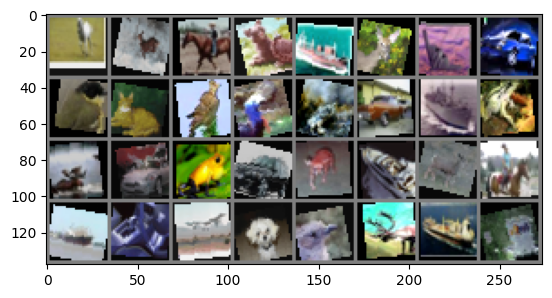

In [30]:
# Get a batch of augmented images
dataiter_augmented = iter(trainloader_augmented)
images_augmented, _ = next(dataiter_augmented)

# Show the augmented images
imshow(torchvision.utils.make_grid(images_augmented))

_transforms.RandomHorizontalFlip()_: Randomly flips the images horizontally.

_transforms.RandomCrop(32, padding=4)_: Randomly crops a 32x32 patch from the image, with padding of 4 pixels on each side.  Padding allows the cropped region to potentially go beyond the original image boundaries, and the cropped region is filled with the values from the padding.

- Impact of Image Augmentation:
    - Increased Data Size: Augmentation effectively increases the number of training examples, which helps to prevent overfitting.
    - Improved Generalization: By exposing the model to a wider variety of image transformations, it becomes more robust to variations in real-world images (e.g., different angles, positions, and lighting conditions).

## Model Building (Defining the CNN Architecture):

We will define a Convolutional Neural Network (CNN) architecture using PyTorch's nn module. CNNs are well-suited for image classification tasks as they can automatically learn hierarchical features from the images.

- _class Net(nn.Module)_: Defines our neural network class, inheriting from nn.Module (the base class for all neural network modules in PyTorch).
- ___init__(self)_: The constructor where we define the layers of our network.
    - _nn.Conv2d(in_channels, out_channels, kernel_size, padding)_: Defines a 2D convolutional layer.
        - _in_channels=3_: The number of input channels (3 for RGB images).
        - _out_channels_: The number of output channels (feature maps).
        - _kernel_size=3_: The size of the convolutional filter (3x3).
        - _padding=1_: Adds padding to the input, which helps to preserve the spatial size of the output.
    - _nn.MaxPool2d(kernel_size, stride)_: Defines a 2D max-pooling layer.
        - _kernel_size=2_: The size of the pooling window (2x2).
        - _stride=2_: The step size for moving the pooling window. Max-pooling reduces the spatial dimensions of the feature maps, making the network more robust to small translations and distortions.
    - _nn.Linear(in_features, out_features)_: Defines a fully connected (linear) layer.
        - _in_features_: The number of input features.
        - _out_features_: The number of output features.
    - _nn.Dropout(p)_: Applies dropout. Dropout is a regularization technique that randomly sets a fraction p of input units to 0 during training. This helps to prevent overfitting.
- _forward(self, x)_: Defines the forward pass of the network (how the input data flows through the layers).
    - _x = self.pool(F.relu(self.conv1(x)))_: Applies the first convolutional layer, followed by the ReLU (Rectified Linear Unit) activation function (which introduces non-linearity), and then the max-pooling layer.
    - _x = self.pool(F.relu(self.conv2(x)))_: Applies the second convolutional layer, ReLU, and max-pooling.
    - _x = self.pool(F.relu(self.conv3(x)))_: Applies the third convolutional layer, ReLU, and max-pooling.
    - _x = x.view(-1, 128 * 4 * 4)_: Flattens the 3D feature maps into a 1D tensor. The -1 infers the batch size. The 128 * 4 * 4 is the number of features after the convolutional and pooling layers (128 channels, and the spatial size has been reduced from 32x32 to 4x4 due to three pooling layers with a stride of 2).
    - _x = F.relu(self.fc1(x))_: Applies the first fully connected layer followed by ReLU.
    - _x = self.dropout(x)_: Applies dropout to the output of the first fully connected layer.
    - _x = self.fc2(x)_: Applies the final fully connected layer. The output size is 10, corresponding to the 10 classes. The raw outputs of this layer are the logits (raw scores before normalization.

In [31]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.dropout = nn.Dropout(0.5)  # Add dropout
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4) # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = self.dropout(x) # Apply dropout
        x = self.fc2(x)
        return x

net = Net()

**Convolutional Layers**: Used to extract spatial features from the images. The number of filters increases as we go deeper, allowing the network to learn more complex features.

**ReLU Activation**: A common non-linear activation function that helps the network learn complex mappings.

**Max-Pooling Layers**: Reduce the dimensionality of the feature maps, making the network more robust and reducing computational cost.

**Dropout**: Helps to prevent overfitting by randomly dropping out some neurons during training.

**Fully Connected Layers**: Used to perform the final classification based on the learned features.

## Training the Model:
Now we need to train our defined CNN on the training data. This involves defining a loss function, an optimizer, and iterating through the training data for multiple epochs.

- _criterion = nn.CrossEntropyLoss()_: Defines the loss function. Cross-entropy loss is commonly used for multi-class classification tasks. It measures the difference between the predicted probability distribution and the true distribution of the labels.
- _optimizer = optim.Adam(net.parameters(), lr=0.001)_: Defines the optimizer. Adam is a popular optimization algorithm that adapts the learning rates for each parameter. net.parameters() provides an iterable of the model's learnable parameters. lr=0.001 sets the initial learning rate.
- _device = torch.device(...) and net.to(device)_: Checks if a CUDA-enabled GPU is available. If so, it sets the device to 'cuda:0'; otherwise, it uses the CPU. Moving the model to the GPU can significantly speed up training.

Training Loop:
- _num_epochs_: The number of times to iterate over the entire training dataset.  I've increased it to 20.
- The inner loop iterates over the training data in batches using the _trainloader_augmented_ (which now uses the augmented data).
- _optimizer.zero_grad()_: Resets the gradients of the model's parameters before each batch.
- _outputs = net(inputs)_: Performs the forward pass: the input images are passed through the network to produce the output logits.
- _loss = criterion(outputs, labels)_: Calculates the loss between the predicted outputs and the true labels.
- _loss.backward()_: Performs backpropagation: the gradients of the loss with respect to the model's parameters are computed.
- _optimizer.step()_: Updates the model's parameters based on the computed gradients and the optimization algorithm.
- The code prints the average loss every 2000 mini-batches to monitor the training progress.

Saving the Model: Saves the trained model's state dictionary (the learned parameters) to a file. This allows you to load the trained model later for evaluation or deployment without having to retrain it.

In [36]:
import torch.optim as optim

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Check if CUDA (GPU) is available and use it if possible
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Check if MPS (Metal Performance Shaders) is available
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

net.to(device) # Move the model to GPU if available

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

In [37]:
# Training loop
num_epochs = 20 # Increased the number of epochs
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader_augmented, 0): # Use the augmented data
        inputs, labels = data[0].to(device), data[1].to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass (compute gradients)
        loss.backward()

        # Optimize (update weights)
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # Print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

# Save the trained model
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

Finished Training


## Hypertuning: 
Hyperparameter tuning is crucial for optimizing model performance. 

- **Learning Rate**: The learning rate controls how much the model's weights are updated in response to the estimated error each time the model's weights are updated. We can try values like 0.01, 0.001, and 0.0001.
- **Optimizer**: We used Adam, but we could also try other optimizers like SGD (Stochastic Gradient Descent) or RMSprop.
- **Batch Size**: The number of samples per gradient update. We used 32, but we could try 16, 64, or 128.
- **Number of Epochs**: The number of complete passes through the training dataset. We used 20, but we could try more or fewer epochs.
- **Network Architecture**: We can experiment with different CNN architectures, such as:
    - Adding more convolutional layers.
    - Changing the number of filters in each layer.
    - Trying different kernel sizes.
    - Adding more fully connected layers or changing their sizes.
    - Using different activation functions (e.g., LeakyReLU, ELU).
- **Regularization**: We used dropout, but we could also experiment with L1 or L2 regularization (weight decay).
- **Image Augmentation**: The type and strength of augmentation can be tuned.

In [38]:
from torch.optim import Adam, SGD
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define a function to train and evaluate the model with given hyperparameters
def train_and_evaluate(model, optimizer, criterion, trainloader, testloader, num_epochs, device):
    model.to(device)
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        #print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}')
    # Evaluate the model on the test set
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f}%')
    return accuracy

In [39]:
# Define the CNN architecture (you can experiment with different architectures)
class Net(nn.Module):
    def __init__(self, dropout_rate=0.5): # Added dropout_rate as a parameter
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [40]:
# Define the data transformations (with augmentation)
transform_augmented = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [41]:
# Load the datasets
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_augmented)
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
# Define the device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

In [42]:
# Define the hyperparameters to search
learning_rates = [0.001, 0.0001]
optimizers = [Adam, SGD]
batch_sizes = [32, 64]
num_epochs = 10
dropout_rates = [0.25, 0.5] # Add dropout rates to the search

best_accuracy = 0.0
best_params = {}

In [43]:
# Perform the hyperparameter search
for lr in learning_rates:
    for optimizer_class in optimizers:
        for batch_size in batch_sizes:
             for dropout_rate in dropout_rates: # Iterate over dropout rates
                print(f'Training with LR={lr}, Optimizer={optimizer_class.__name__}, Batch Size={batch_size}, Dropout={dropout_rate}')
                trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
                testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
                model = Net(dropout_rate=dropout_rate) # Pass dropout rate to the model
                optimizer = optimizer_class(model.parameters(), lr=lr)
                criterion = nn.CrossEntropyLoss()
                accuracy = train_and_evaluate(model, optimizer, criterion, trainloader, testloader, num_epochs, device)

                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {'lr': lr, 'optimizer': optimizer_class.__name__, 'batch_size': batch_size, 'dropout': dropout_rate} #save dropout

print(f'Best Accuracy: {best_accuracy:.2f}%')
print('Best Hyperparameters:', best_params)

Training with LR=0.001, Optimizer=Adam, Batch Size=32, Dropout=0.25
Accuracy of the network on the 10000 test images: 76.15%
Training with LR=0.001, Optimizer=Adam, Batch Size=32, Dropout=0.5
Accuracy of the network on the 10000 test images: 74.22%
Training with LR=0.001, Optimizer=Adam, Batch Size=64, Dropout=0.25
Accuracy of the network on the 10000 test images: 77.96%
Training with LR=0.001, Optimizer=Adam, Batch Size=64, Dropout=0.5
Accuracy of the network on the 10000 test images: 76.12%
Training with LR=0.001, Optimizer=SGD, Batch Size=32, Dropout=0.25
Accuracy of the network on the 10000 test images: 33.75%
Training with LR=0.001, Optimizer=SGD, Batch Size=32, Dropout=0.5
Accuracy of the network on the 10000 test images: 31.29%
Training with LR=0.001, Optimizer=SGD, Batch Size=64, Dropout=0.25
Accuracy of the network on the 10000 test images: 24.79%
Training with LR=0.001, Optimizer=SGD, Batch Size=64, Dropout=0.5
Accuracy of the network on the 10000 test images: 22.88%
Training

## Model Evaluation:

After training (and hyperparameter tuning), we need to evaluate the model's performance on the test set.

- Loads the saved model's state dictionary from the file.
- The code iterates through the test set.
- For each image, it performs a forward pass through the network to get the predicted output.
- It then compares the predicted labels with the true labels and calculates the accuracy.
- The code also saves all the true labels (y_true) and the predicted labels (y_pred) for generating a confusion matrix.

In [44]:
# Load the trained model
net = Net() #make sure dropout rate is the same as the one used for best model
net.load_state_dict(torch.load(PATH))
net.to(device)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

In [45]:
# Evaluate the model on the test set
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

Accuracy of the network on the 10000 test images: 77.65%


### Visualization (Confusion Matrix):

A confusion matrix is a useful tool for evaluating the performance of a classification model. It shows the number of correct and incorrect predictions for each class.

- _confusion_matrix(y_true, y_pred)_: Computes the confusion matrix from the true labels and the predicted labels.
- _sns.heatmap(...)_: Plots the confusion matrix as a heatmap using Seaborn.
    - _annot=True_: Displays the numerical values in each cell.
    - _fmt='d'_: Specifies the format of the numbers as integers.
    - _cmap='Blues'_: Sets the color map to Blues.
    - _xticklabels and yticklabels_:  Use the class names for the x-axis and y-axis labels.

In [47]:
# Get predictions for the confusion matrix
y_true = []
y_pred = []
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

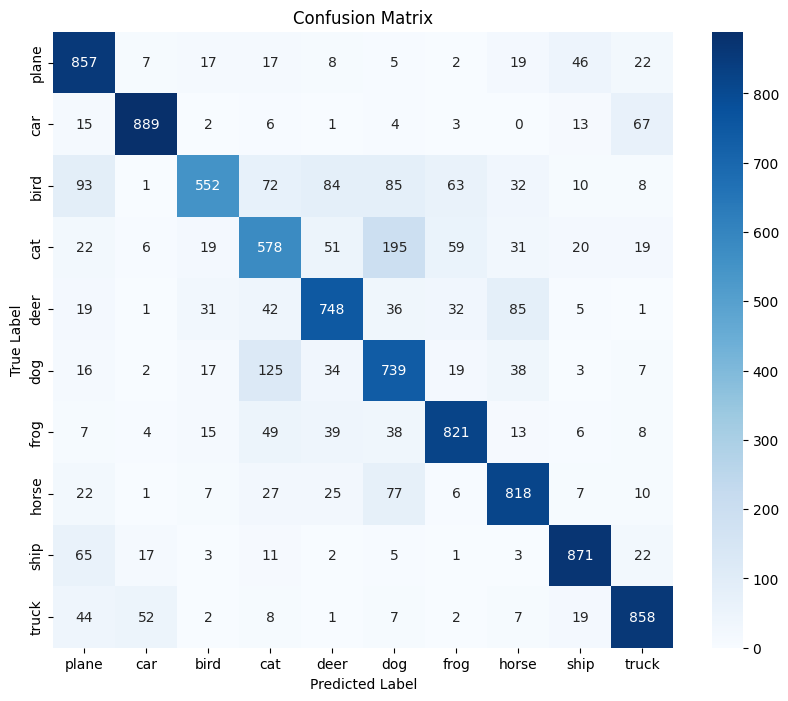

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Insights:

- The model achieved an overall accuracy of 77.65% on the CIFAR-10 test set.
- The model performs particularly well on classifying 'car', 'ship', 'truck' and 'plane', with over 85% accuracy for each
- The model has difficulty distinguishing between 'bird' and 'cat', often misclassifying them.
- 19.5% of 'cat' images were incorrectly classified as 'dog'.

### Streamlit model prediction on random pictures:

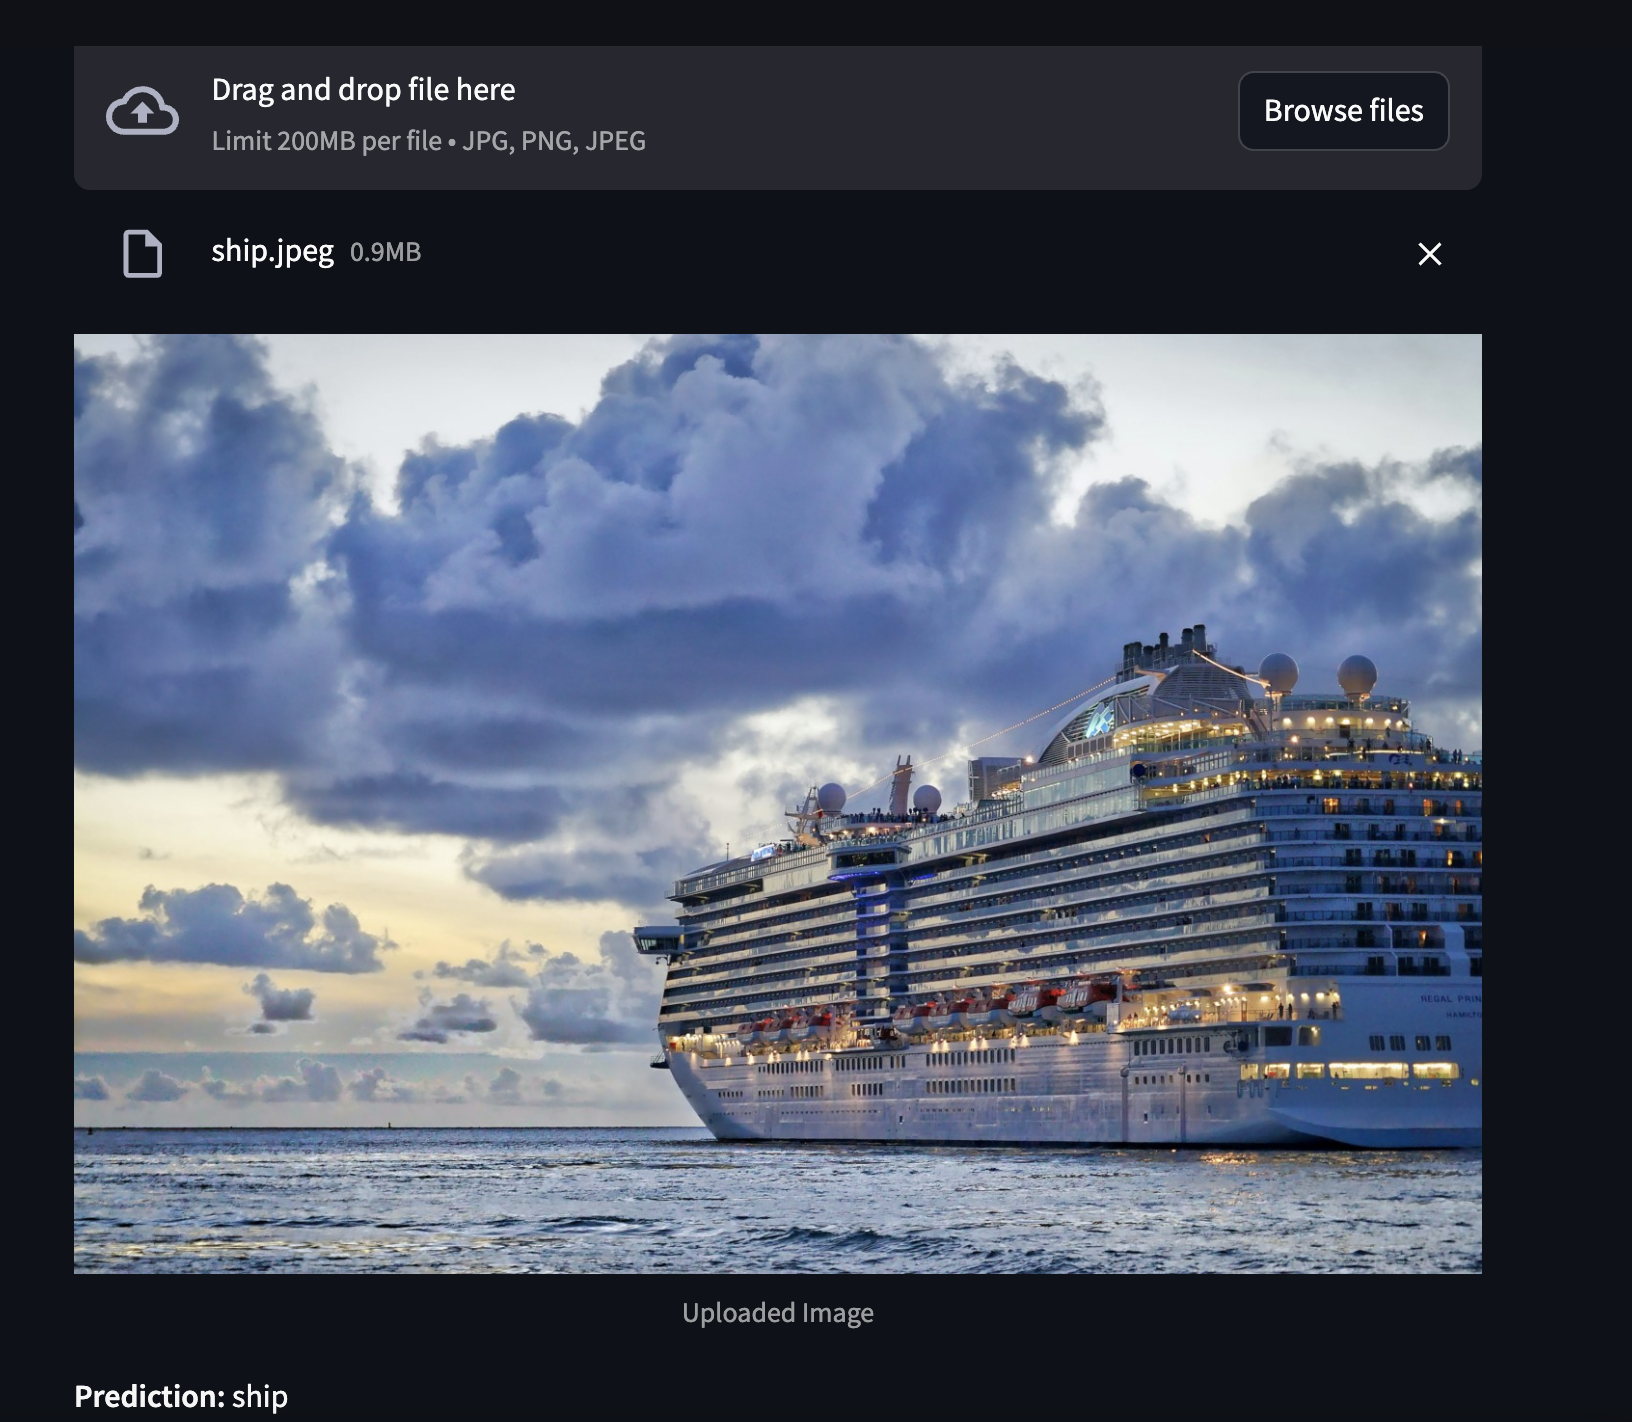

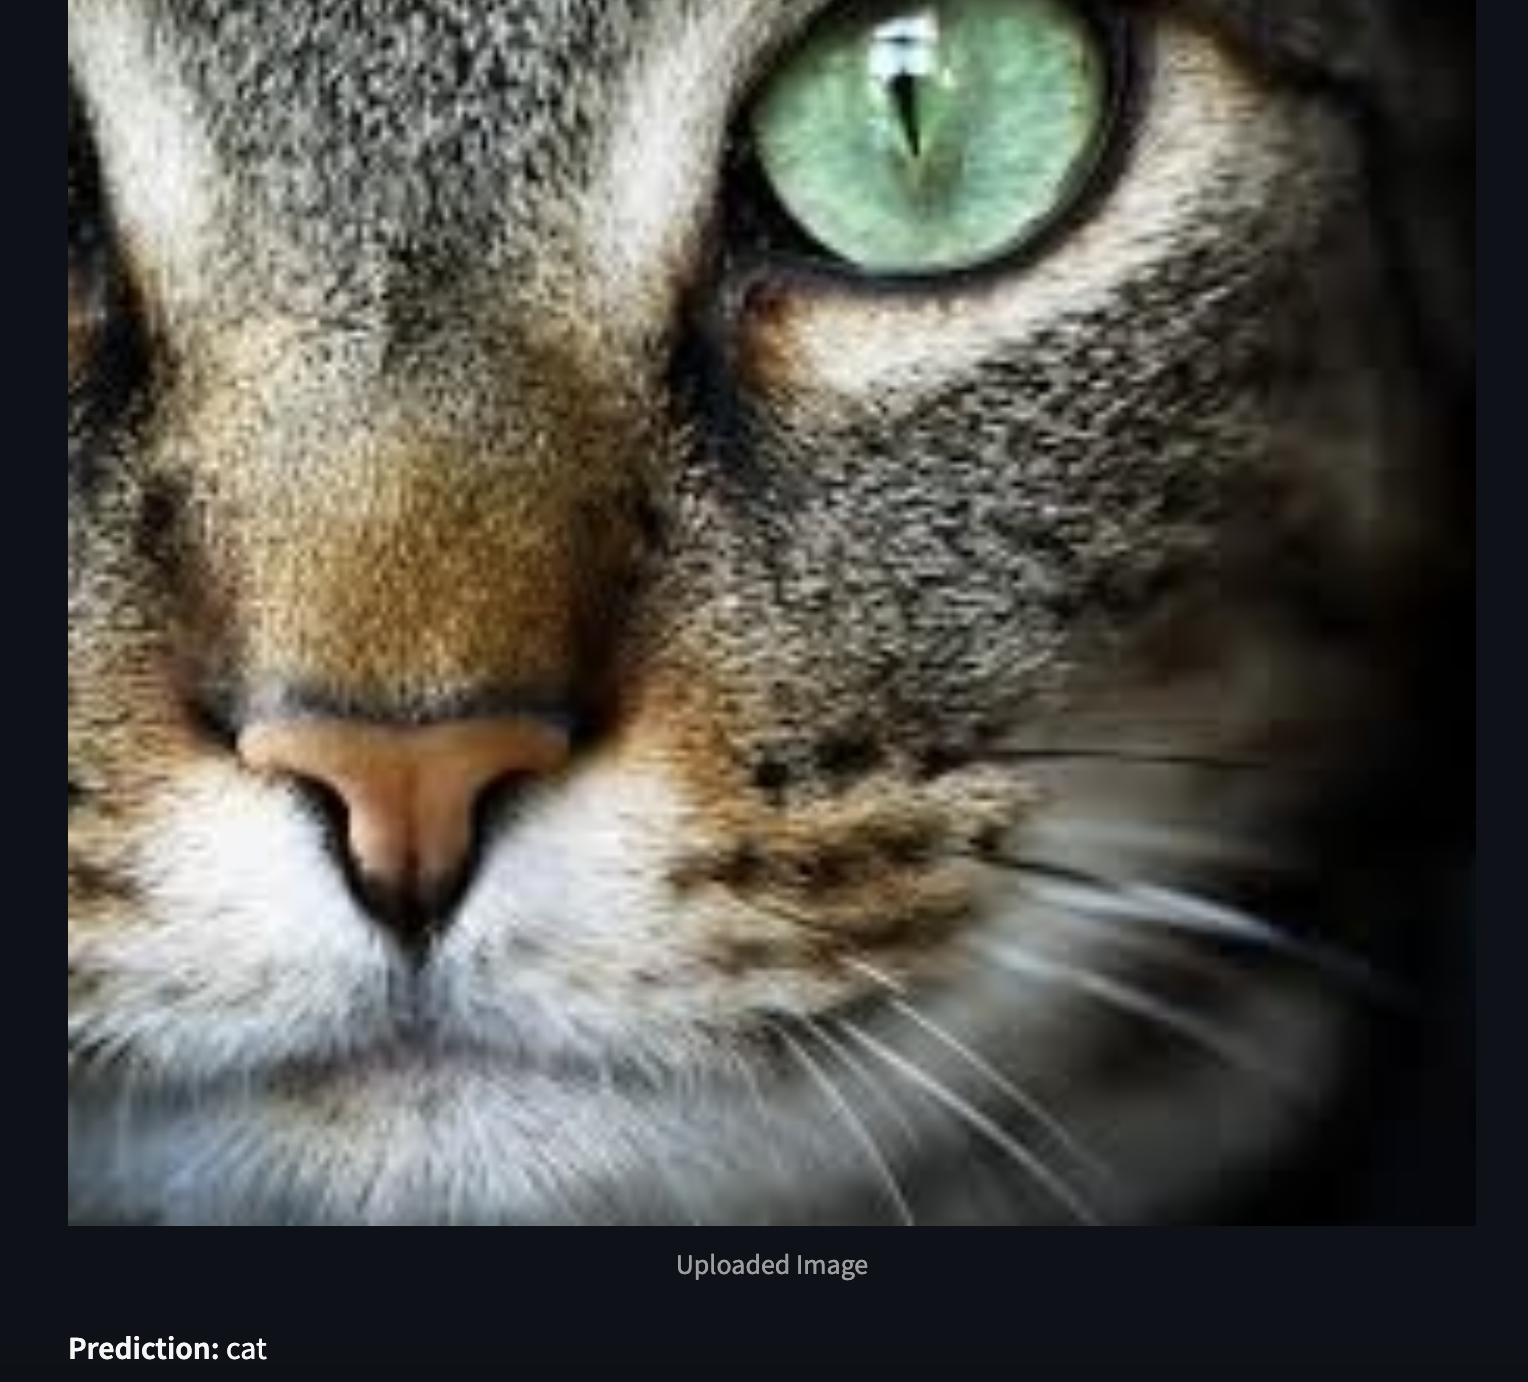

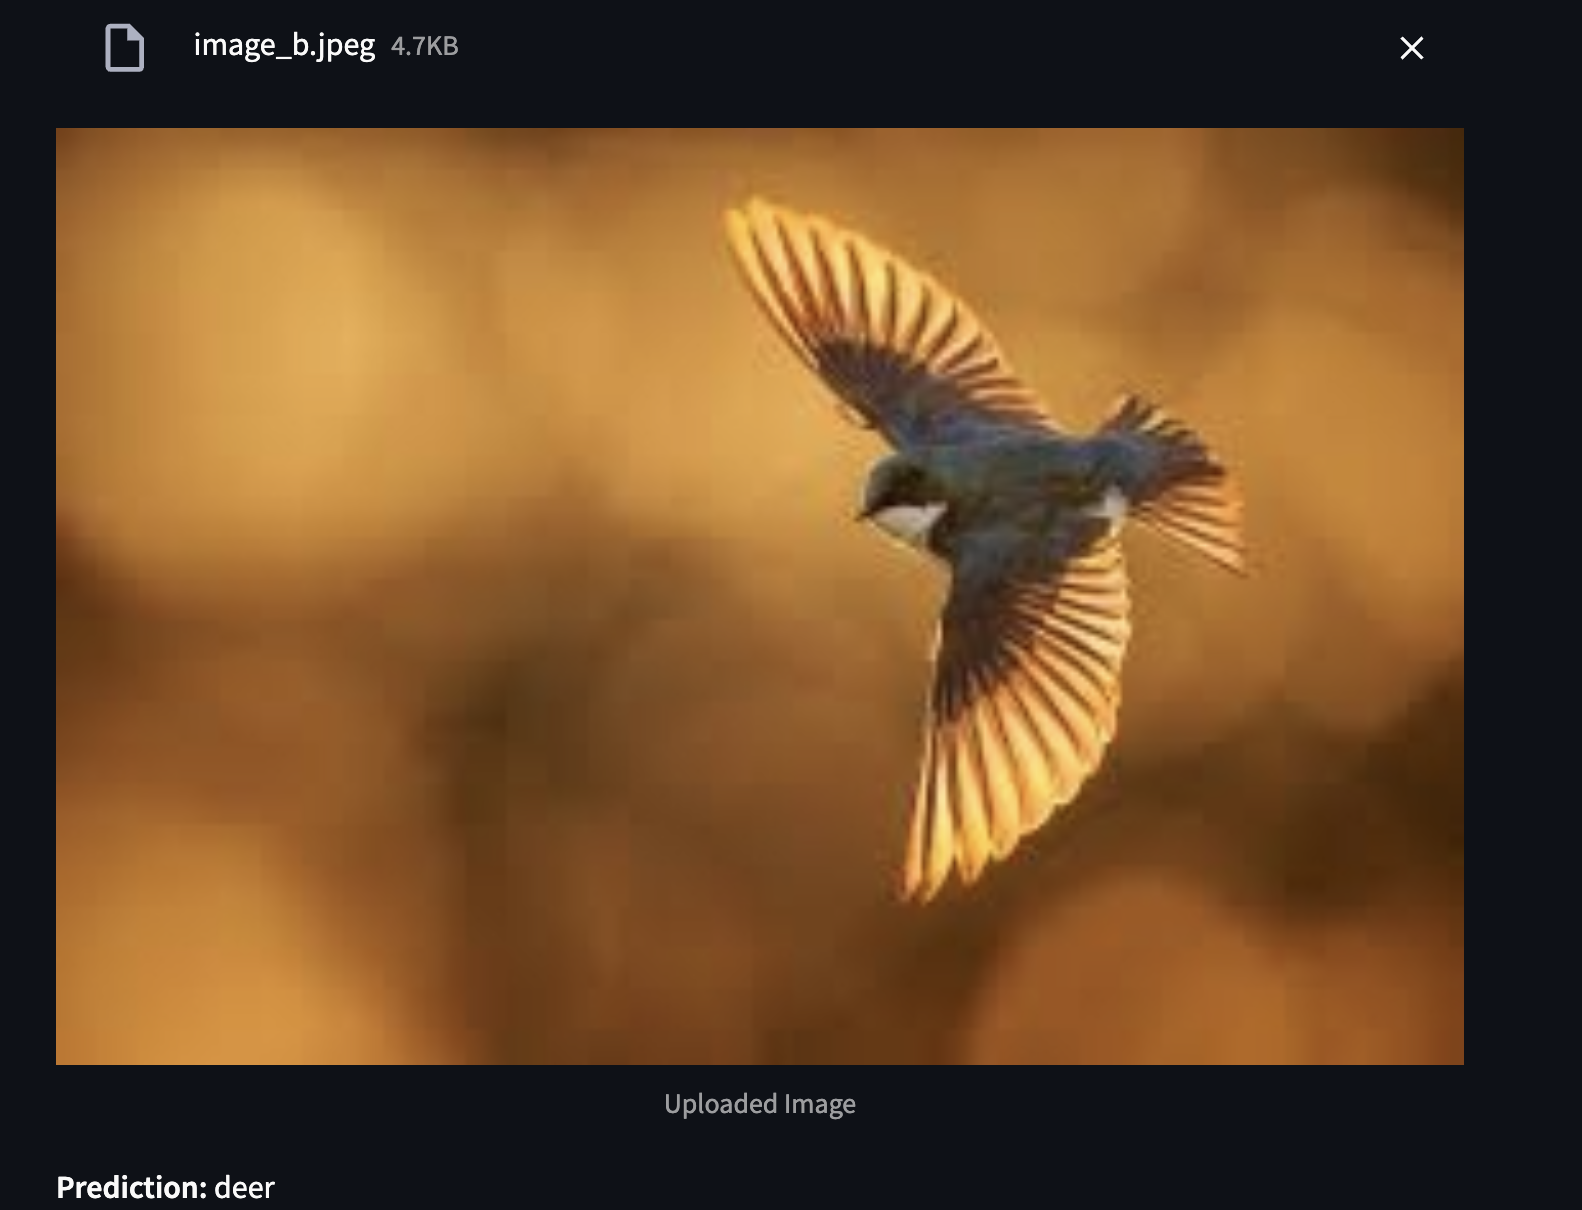

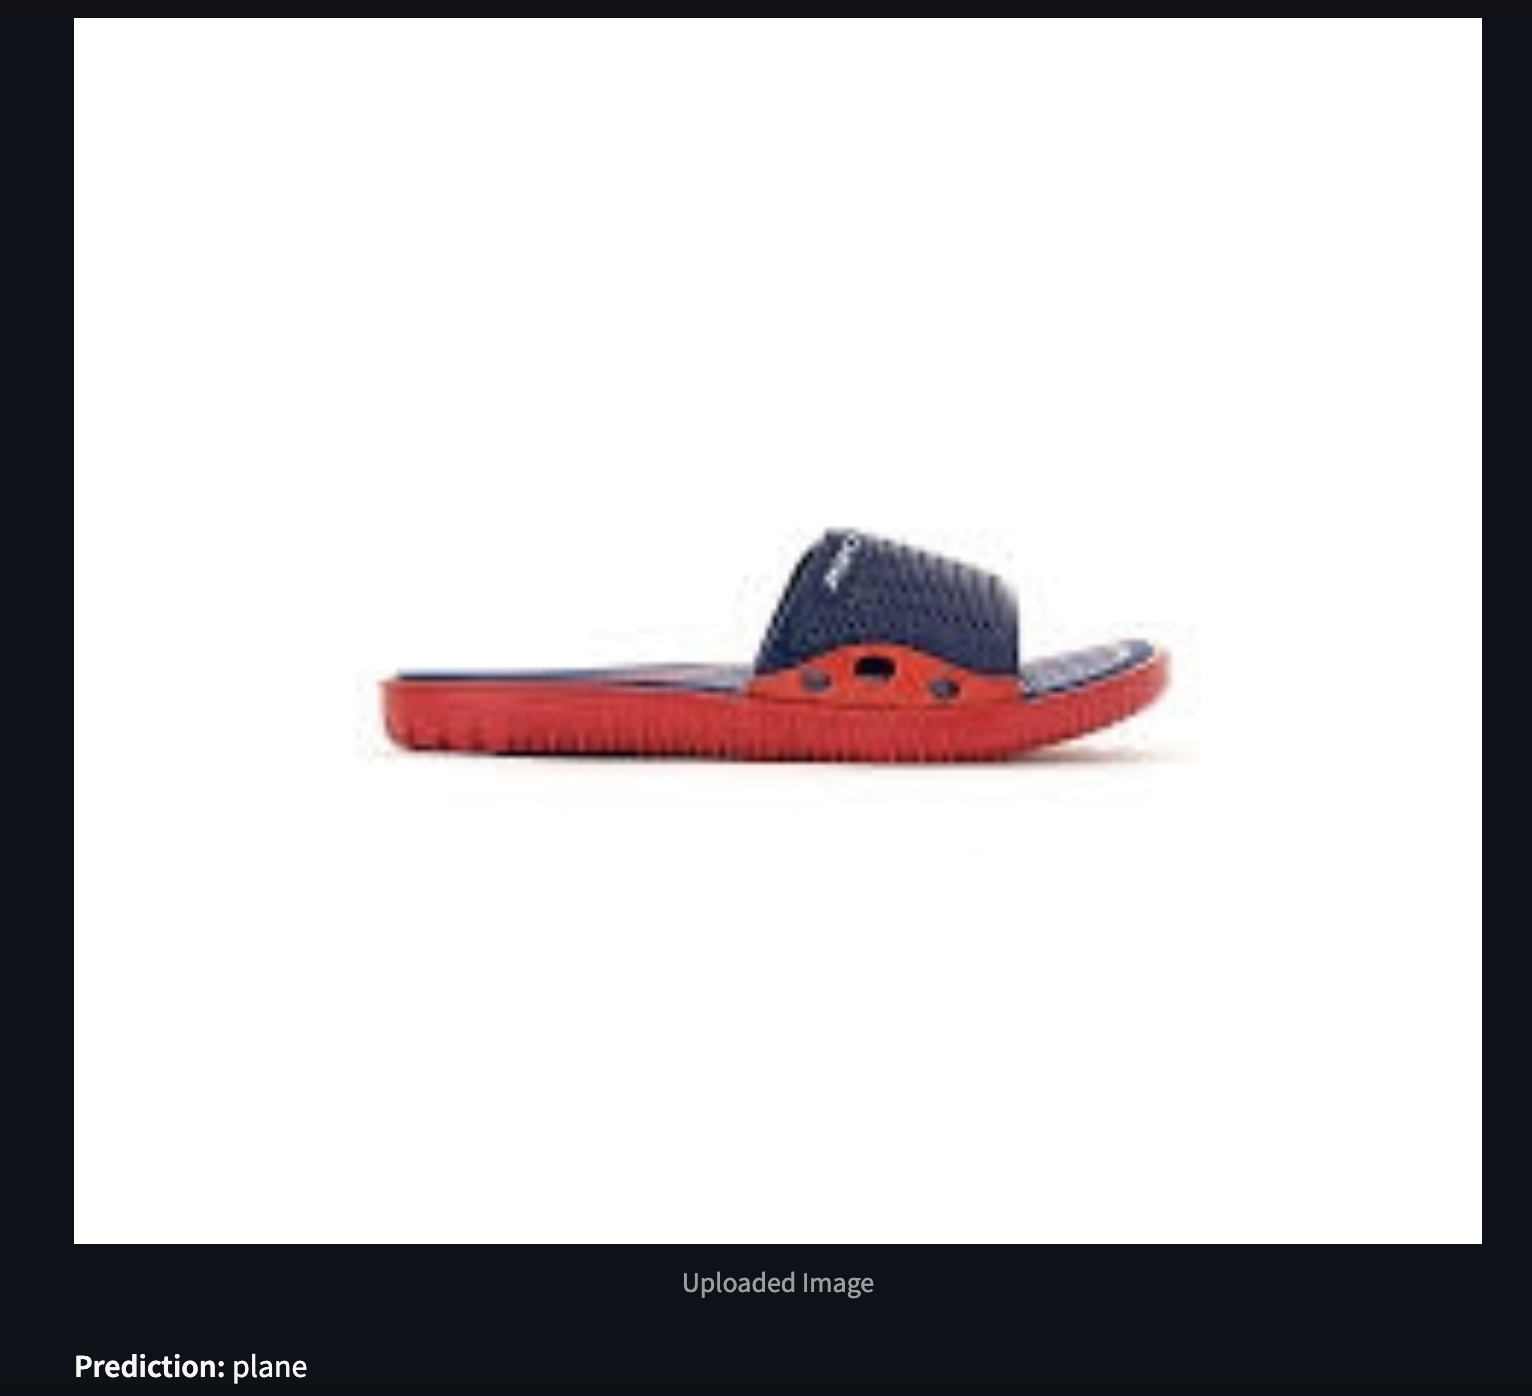